In [1]:
# Jairo Andres Saavedra Alfonso
# 01 de Febrero de 2019
# Universidad de Los Andes
# Phycis 
######################__________________Weekly Report__________________######################
# Beta 1.0

In [1]:
#Packages
from astropy.io import fits
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import torch 
import torch.nn as nn
import fitsio
from sklearn.model_selection import train_test_split
from torch.autograd import Variable
import torch.utils.data
import time
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

class_names=['Star','Galaxy','QSO','QSO_BAL']

y=np.genfromtxt('F2.txt')
y_pred=y[:,0]
y_test=y[:,1]


def plot_confusion_matrix(y_true, y_pred, classes,normalize=False,title=None,cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    """
    #print(cm)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.subplots(121)
#y_test=y_test.detach().numpy()
#y_pred=y_pred.detach().numpy()
#print(y_pred)
plot_confusion_matrix(y_test, y_test, classes=class_names, title='Confusion matrix')
plt.savefig('cm_train2.jpg')
#plt.subplots(122)
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix')
plt.savefig('cm_test2.jpg')
plt.show()

#cmd='jupyter nbconvert --to python SpectraNET_C.ipynb'
#os.system(cmd)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# Assuming that we are on a CUDA machine, this should print a CUDA device:
print('This net is brought to you by',device)

<Figure size 640x480 with 2 Axes>

<Figure size 640x480 with 2 Axes>

This net is brought to you by cpu


In [14]:
s,g,q,qb=0,0,0,0
unique, count = np.unique(y_test, return_counts=True)
st,gt,qt,qbt=count[0],count[1],count[2],count[3]
for i in range(y_pred.shape[0]):
    if((y_test[i]==0)&(y_pred[i]==y_test[i])):
        s+=1
    if((y_test[i]==1)&(y_pred[i]==y_test[i])):
        g+=1
    if((y_test[i]==2)&(y_pred[i]==y_test[i])):
        q+=1
    if((y_test[i]==3)&(y_pred[i]==y_test[i])):
        qb+=1
print(s,g,q,qb)        
s,g,q,qb=s/st*100,g/gt*100,q/qt*100,qb/qbt*100    
print(s,g,q,qb)
#print(unique,counts)

3806 3902 3640 3722
97.43983614951357 95.80162042720353 91.09109109109109 92.472049689441


3718 3980 3714 3553
95.18689196108551 97.71667075865456 92.94294294294293 88.27329192546584


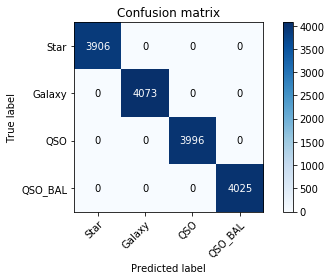

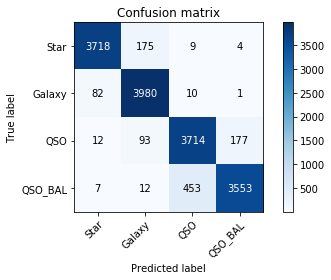

In [2]:
y=np.genfromtxt('F1.txt')
y_pred=y[:,0]
y_test=y[:,1]

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.subplots(121)
#y_test=y_test.detach().numpy()
#y_pred=y_pred.detach().numpy()
#print(y_pred)
plot_confusion_matrix(y_test, y_test, classes=class_names, title='Confusion matrix')
plt.savefig('cm_train1.jpg')
#plt.subplots(122)
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix')
plt.savefig('cm_test1.jpg')

s,g,q,qb=0,0,0,0
unique, count = np.unique(y_test, return_counts=True)
st,gt,qt,qbt=count[0],count[1],count[2],count[3]
for i in range(y_pred.shape[0]):
    if((y_test[i]==0)&(y_pred[i]==y_test[i])):
        s+=1
    if((y_test[i]==1)&(y_pred[i]==y_test[i])):
        g+=1
    if((y_test[i]==2)&(y_pred[i]==y_test[i])):
        q+=1
    if((y_test[i]==3)&(y_pred[i]==y_test[i])):
        qb+=1
print(s,g,q,qb)        
s,g,q,qb=s/st*100,g/gt*100,q/qt*100,qb/qbt*100    
print(s,g,q,qb)

In [11]:
N_sample=4
batch_size=480
n_iter=10000  
test_size=0.2 # 20%
val_size=0.25 # 25% of trainning size

n_train=int(N_sample*(1-test_size)*(1-val_size))
epochs = int(n_iter / (n_train / batch_size))

#fi= open("Trainning_INFO.txt","w+")

#fi.write('INFO: Epochs:{} -- Batch size:{} \n'.format(epochs,batch_size))

In [19]:
def Load_Files(file_1,file_2,N_sample,objts,classification=True):
    hdul = fits.open(file_1) # Open file 1 -- 'truth_DR12Q.fits'
    info=hdul.info() # File info
    columns=hdul[1].columns # File Columns 
    print('INFO:',info,'/n',columns)
    data=hdul[1].data # Database of spectra with human-expert classifications 

    # Reading data from data_dr12.fits. This file had the spectra from data dr12. 
    hdul_2 = fits.open(file_2) # Open file 2 -- 'data_dr12.fits'
    info2=hdul_2.info() # File info 
    columns2=hdul_2[1].columns # File Columns
    print('INFO:',info2,'/n',columns2)
    data2=hdul_2[1].data # Database of spectra
    spectra=hdul_2[0].data # Spectrum of each object 
    
    # Subset of PLATE parameters of both data
    data_PLATE_1=data['PLATE']
    data_PLATE_2=data2['PLATE']

    # Subset of MJD parameters of both data
    data_MJD_1=data['MJD']
    data_MJD_2=data2['MJD']

    # Subset of FIBERID parameters of both data
    data_FIBERID_1=data['FIBERID']
    data_FIBERID_2=data2['FIBERID']
    data_ID_1=data['THING_ID']
    data_ID_2=data2['TARGETID']
    
    objts=np.asarray(objts)
    
    # The column 'CLASS_PERSON' have a class identifier for each spectrum: STARS=1, GALAXY=4, QSO=3 and QSO_BAL=30.
    C_P=data['CLASS_PERSON'] #Class Person column 
    STAR=C_P[C_P==1] # objects classified as stars
    GALAXY=C_P[C_P==4] # objects classified as galaxies 
    QSO=C_P[C_P==3] # objects classified as QSO (Quasars)
    QSO_BAL=C_P[C_P==30] # objects classified as QSO BAL (Quasars with Broad Absortions Lines)
    N_C=C_P[C_P!=30]   
    N_C=N_C[N_C!=3]
    N_C=N_C[N_C!=1]
    N_C=N_C[N_C!=4] # objects wrong classified
    
    print('Star:',STAR.shape)
    print('Galaxy:',GALAXY.shape)
    print('QSO:',QSO.shape)
    print('QSO BAL:',QSO_BAL.shape)
    print('NN:',N_C.shape)
    
    # I create two DataFrame for Superset_DR12Q and data_dr12 with only three parameters
    data1={'PLATE':data_PLATE_1,'MJD':data_MJD_1,'FIBERID':data_FIBERID_1,'ID':data_ID_1}
    data1=pd.DataFrame(data=data1)

    data2={'PLATE':data_PLATE_2,'MJD':data_MJD_2,'FIBERID':data_FIBERID_2,'ID':data_ID_2}
    data2=pd.DataFrame(data=data2)

    # I convert all objects in both set to string chain in orden to combine them as one new ID.
    data1['PLATE']=data1['PLATE'].astype(str)
    data1['MJD']=data1['MJD'].astype(str)
    data1['FIBERID']=data1['FIBERID'].astype(str)
    data1['PM'] = data1['MJD'].str.cat(data1['FIBERID'],sep="-")
    data1['NEWID'] = data1['PLATE'].str.cat(data1['PM'],sep="-")
    data_1=data1.drop(columns=['PLATE','MJD','FIBERID','ID','PM']).values

    data2['PLATE']=data2['PLATE'].astype(str)
    data2['MJD']=data2['MJD'].astype(str)
    data2['FIBERID']=data2['FIBERID'].astype(str)
    data2['PM'] = data2['MJD'].str.cat(data2['FIBERID'],sep="-")
    data2['NEWID'] = data2['PLATE'].str.cat(data2['PM'],sep="-")
    data_2=data2.drop(columns=['PLATE','MJD','FIBERID','ID','PM']).values # New set of database 2 with new ID's

    # With the routine of numpy intersect1d, I find the intersections elements in both sets. This elements  
    data_CO=np.array(np.intersect1d(data_1,data_2,return_indices=True))

    data_CO_objects=data_CO[0] # The unique new ID of each element in both sets
    data_CO_ind1=data_CO[1] # Indices of intersected elements from the original data 1 (Superset_DR12Q.fits) 
    data_CO_ind2=data_CO[2] # Indices of intersected elements form the original data 2 (data_dr12.fits)
    print('I find',len(data_CO_objects),'objects with spectra from DR12')
    #print(data_CO_ind1,data_CO_ind2)
    indi={'ind1':data_CO_ind1,'ind2':data_CO_ind2}
    ind=pd.DataFrame(data=indi,index=data_CO_ind1)

    cp=np.array(data['CLASS_PERSON'],dtype=float)
    z=np.array(data['Z_VI'],dtype=float)
    zc=np.array(data['Z_CONF_PERSON'],dtype=float)
    bal=np.array(data['BAL_FLAG_VI'],dtype=float)
    bi=np.array(data['BI_CIV'],dtype=float)

    d={'CLASS_PERSON':cp,'Z_VI':z,'Z_CONF_PERSON':zc,'BAL_FLAG_VI':bal,'BI_CIV':bi}
    data_0=pd.DataFrame(data=d)#.values #super database
    
    obj=data_0.loc[data_CO_ind1]
    
    if(classification!=True):

        if(objts[0]=='QSO'):
            qsos=obj.loc[obj['CLASS_PERSON']==3]
            qsos=qsos.loc[qsos['Z_CONF_PERSON']==3]
            sample_objects=qsos.sample(n=int(N_sample),weights='CLASS_PERSON', random_state=5)
            
            indi=np.array(sample_objects.index)
            indi1=ind.loc[indi].values
            
        elif(objts[0]=='QSO_BAL'):
            qsos_bal=obj.loc[obj['CLASS_PERSON']==30]
            qsos_bal=qsos_bal.loc[qsos_bal['Z_CONF_PERSON']==3]
            sample_objects=qsos_bal.sample(n=int(N_sample),weights='CLASS_PERSON', random_state=5)
            
            indi=np.array(sample_objects.index)
            indi1=ind.loc[indi].values
            
        elif(len(objts)==2):
            qsos=obj.loc[obj['CLASS_PERSON']==3]
            qsos=qsos.loc[qsos['Z_CONF_PERSON']==3]
            
            qsos_bal=obj.loc[obj['CLASS_PERSON']==30] 
            qsos_bal=qsos_bal.loc[qsos_bal['Z_CONF_PERSON']==3]
            
            sample_qso=qsos.sample(n=int(N_sample/2),weights='CLASS_PERSON', random_state=5)
            sample_qso_bal=qsos_bal.sample(n=int(N_sample/2),weights='CLASS_PERSON', random_state=5)
            sample_objects=pd.concat([sample_qso,sample_qso_bal])
            
            ind_qso=np.array(sample_qso.index)
            ind_qso_bal=np.array(sample_qso_bal.index)
            
            indi=np.concatenate((ind_qso,ind_qso_bal), axis=None)
            indi1=ind.loc[indi].values

        spectra_=np.zeros((N_sample,886))
            
        j=0
        for i in indi:
            k=indi1[j,1]
            spectra_[j,:]=spectra[k,:]
            j=j+1    
            
        spectra_=pd.DataFrame(spectra_)
        X=spectra_.values
        
        mean_flx= np.ma.average(X[:,:443], weights=X[:,443:],axis=1)
        ll=(X[:,:443]-mean_flx.reshape(-1,1))**2
        aveflux=np.ma.average(ll, weights=X[:,443:],axis=1)
        sflux = np.sqrt(aveflux)
        X = (X[:,:443]-mean_flx.reshape(-1,1))/sflux.reshape(-1,1)        
        
        y=sample_objects['Z_VI']
        #y_max=torch.max(y)
        #y=y/y_max
        y=np.array(y,dtype=float)
        y_max=np.max(y)
        y=y/y_max
        
        return X,y
            
    stars=obj.loc[obj['CLASS_PERSON']==1]
    galaxies=obj.loc[obj['CLASS_PERSON']==4]
    qsos=obj.loc[obj['CLASS_PERSON']==3]
    qsos_bal=obj.loc[obj['CLASS_PERSON']==30]

    sample_star=stars.sample(n=int(N_sample/4),weights='CLASS_PERSON', random_state=5)
    sample_galaxy=galaxies.sample(n=int(N_sample/4),weights='CLASS_PERSON', random_state=5)
    sample_qso=qsos.sample(n=int(N_sample/4),weights='CLASS_PERSON', random_state=5)
    sample_qso_bal=qsos_bal.sample(n=int(N_sample/4),weights='CLASS_PERSON', random_state=5)

    sample_objects=pd.concat([sample_star,sample_galaxy,sample_qso,sample_qso_bal])

    ind_star=np.array(sample_star.index)
    ind_galaxy=np.array(sample_galaxy.index)
    ind_qso=np.array(sample_qso.index)
    ind_qso_bal=np.array(sample_qso_bal.index)

    indi=np.concatenate((ind_star, ind_galaxy,ind_qso,ind_qso_bal), axis=None)
    indi1=ind.loc[indi].values

    spectra_=np.zeros((N_sample,886))
    j=0
    for i in indi:
        k=indi1[j,1]
        spectra_[j,:]=spectra[k,:]#np.log(abs(spectra[k,:443]))
        j=j+1    
        
        
    spectra_=pd.DataFrame(spectra_)
    X=spectra_.values
    print(X.shape)
    
    #Renormalize spectra

    y=sample_objects['CLASS_PERSON']
    y=y.replace([1, 4, 3, 30], [0,1,2,3]).values
    y=np.array(y,dtype=float)

    return X,y


In [20]:
def Loader(X,y,N_sample):

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=1)
    
    train_data = []
    
    for i in range(y_train.shape[0]):
        xt=X_train[i,:].reshape(1,-1)
        train_data.append([Variable(torch.tensor(xt, dtype=torch.float)), torch.tensor(y_train[i], dtype=torch.long)])
    
    train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batch_size)

    test_data = []
    for i in range(y_test.shape[0]):
        xtst=X_test[i,:].reshape(1,-1)
        test_data.append([Variable(torch.tensor(xtst, dtype=torch.float)), torch.tensor(y_test[i], dtype=torch.long)])
    
    test_loader = torch.utils.data.DataLoader(test_data, shuffle=True, batch_size=batch_size)
    
    val_data = []
    for i in range(y_val.shape[0]):
        xv=X_val[i,:].reshape(1,-1)
        val_data.append([Variable(torch.tensor(xv, dtype=torch.float)), torch.tensor(y_val[i], dtype=torch.long)])
    
    val_loader = torch.utils.data.DataLoader(val_data, shuffle=True, batch_size=batch_size)
    
    print('INFO:')
    print('Train shape:',y_train.shape[0])
    print('Val shape:',y_val.shape[0])
    print('Test shape:',y_test.shape[0])
    return train_loader,test_loader,val_loader

In [28]:
X,y=Load_Files('truth_DR12Q.fits','data_dr12.fits',N_sample, None, classification=True)
print(X.shape)
#train_loader,test_loader,val_loader=Loader(X,y,N_sample)

Filename: truth_DR12Q.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     27   546856R x 9C   [J, D, J, J, J, J, J, D, D]   
INFO: None /n ColDefs(
    name = 'THING_ID'; format = 'J'
    name = 'Z_VI'; format = 'D'
    name = 'PLATE'; format = 'J'
    name = 'MJD'; format = 'J'
    name = 'FIBERID'; format = 'J'
    name = 'CLASS_PERSON'; format = 'J'
    name = 'Z_CONF_PERSON'; format = 'J'
    name = 'BAL_FLAG_VI'; format = 'D'
    name = 'BI_CIV'; format = 'D'
)
Filename: data_dr12.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (886, 639464)   float64   
  1                1 BinTableHDU     16   639464R x 4C   [J, J, J, J]   
INFO: None /n ColDefs(
    name = 'TARGETID'; format = 'J'
    name = 'PLATE'; format = 'J'
    name = 'MJD'; format = 'J'
    name = 'FIBERID'; format = 'J'
)
Star: (207915,)
Galaxy: (22795,)
QSO:

Class:0.0


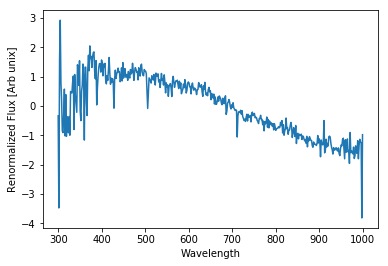

Class:1.0


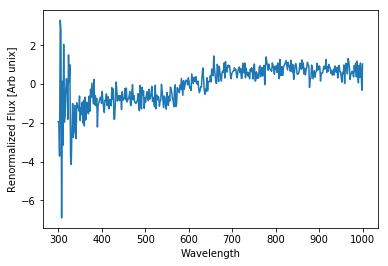

Class:2.0


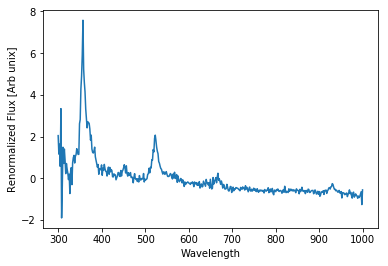

Class:3.0


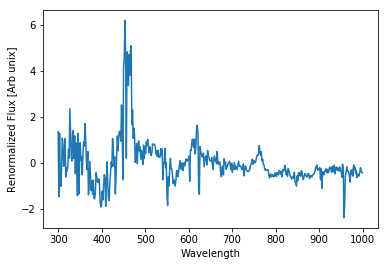

In [29]:
#"""

mean_flx= np.ma.average(X[:,:443],axis=1)
ll=(X[:,:443]-mean_flx.reshape(-1,1))**2
aveflux=np.ma.average(ll,axis=1)
sflux = np.sqrt(aveflux)
X = (X[:,:443]-mean_flx.reshape(-1,1))/sflux.reshape(-1,1)
#"""


for i in range(4):
    x=np.linspace(300,1000,443)
    print('Class:{}'.format(y[i]))
    plt.plot(x,X[i,:])
    plt.xlabel('Wavelength')
    plt.ylabel('Renormalized Flux [Arb unix]')
    plt.savefig('spectrum_nw{}.jpg'.format(i))
    plt.show()

In [9]:
# CNN for classification
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import precision_recall_fscore_support


learning_rate=0.1

class Net_C(nn.Module):
    def __init__(self):
        super(Net_C, self).__init__()
        self.conv1 = nn.Conv1d(1, 64, 15,stride=2)
        self.conv2 = nn.Conv1d(64, 128, 15,stride=2)
        self.conv3 = nn.Conv1d(128, 256, 15,stride=2)
        self.conv4 = nn.Conv1d(256, 256, 15,stride=2)
        self.pool = nn.MaxPool1d(2, 1)
        self.fc1 = nn.Linear(3328, 16)
        #self.fc1 = nn.Linear(10300, 16)
        self.fc2 = nn.Linear(16, 4)
        self.dropout=nn.Dropout(0.5)
        self.bn=nn.BatchNorm1d(16)


    def forward(self, x):
        in_size = x.size(0)
        x = self.pool(F.relu(self.conv1(x)))
        ##x = self.dropout(x)
        x = self.pool(F.relu(self.conv2(x)))
        #x = self.dropout(x)
        x = self.pool(F.relu(self.conv3(x)))
        #x = self.dropout(x)
        x = self.pool(F.relu(self.conv4(x)))
        x = self.dropout(x)
        x = x.view(in_size, -1)
        x = F.relu(self.fc1(x))     
        x = self.bn(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x)
    


In [10]:

net_C = Net_C()
print(net_C)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_C.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.75, patience=8, 
                                             verbose=True, threshold=0.00001, threshold_mode='rel',
                                             cooldown=1, min_lr=1e-8, eps=1e-08)

loss_=[]
loss_val=[]

iterations=0 

# Training loop
for i in range(epochs):
    fi.write('Epoch:{} \n'.format(i+1))

    running_loss = 0.0
    
    for batch_idx, (data, target) in enumerate(train_loader,0):
        data, target = Variable(data), Variable(target)

        optimizer.zero_grad()
        
        output = net_C(data)
        loss = criterion(output, target)  
        loss.backward()
        optimizer.step()
        
        running_loss = loss.item()
        loss_.append(running_loss)
        iterations+=1
        
        if(iterations % 60 == 0):
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in val_loader:
                
                images, labels = Variable(images), Variable(labels)
                
                # Forward pass only to get logits/output
                outputs = net_C(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                loss_v = criterion(outputs, labels) 
                running_loss_val = loss_v.item()
                loss_val.append(running_loss_val)
                

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                # Without .item(), it is a uint8 tensor which will not work when you pass this number to the scheduler
                correct += (predicted == labels).sum().item()

            accuracy = 100 * correct / total
            if(iterations % 20 == 0):
                fi.write('Batch: {} -- Iteration: {} -- Trainning Loss: {} -- Validation loss: {} -- Accuracy: {} % \n'.format(batch_idx+1, iterations, loss.item(), loss_v.item(), accuracy))
                                
    scheduler.step(accuracy)
    
print('INFO: Finished Training')

Net_C(
  (conv1): Conv1d(1, 64, kernel_size=(15,), stride=(2,))
  (conv2): Conv1d(64, 128, kernel_size=(15,), stride=(2,))
  (conv3): Conv1d(128, 256, kernel_size=(15,), stride=(2,))
  (conv4): Conv1d(256, 256, kernel_size=(15,), stride=(2,))
  (pool): MaxPool1d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3228, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=4, bias=True)
  (dropout): Dropout(p=0.5)
  (bn): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


RuntimeError: size mismatch, m1: [480 x 3328], m2: [3228 x 16] at /opt/conda/conda-bld/pytorch-cpu_1549632688322/work/aten/src/TH/generic/THTensorMath.cpp:940

In [ ]:
loss_val=np.asarray(loss_val)

epoch=np.linspace(0,len(loss_val),len(loss_val))

plt.plot(epoch,loss_val,label='Validation loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.savefig('Validation_loss_Classification.jpg')
plt.close()

In [ ]:
correct = 0
total = 0
d=[]
d1=[]

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net_C(images)
        _, predicted = torch.max(outputs.data, 1)
        d.append(predicted)
        d1.append(labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        

print('INFO: Accuracy of the network on the test images: %d %%' % (100 * correct / total))
#d=np.asarray(d)
#print(d[0].shape)
#print(d1[0].shape)
y_pred=torch.cat((d[0],d[1]),0)
y_test=torch.cat((d1[0],d1[1]),0)
#print(y_pred.shape)



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

class_names=['Star','Galaxy','QSO','QSO_BAL']

def plot_confusion_matrix(y_true, y_pred, classes,normalize=False,title=None,cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    """
    #print(cm)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.subplots(121)
#y_test=y_test.detach().numpy()
#y_pred=y_pred.detach().numpy()
#print(y_pred)
plot_confusion_matrix(y_test, y_test, classes=class_names, title='Confusion matrix')
plt.savefig('cm_train.png')
#plt.subplots(122)
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix')
plt.savefig('cm_test.png')

from sklearn.metrics import precision_recall_curve
p,r,f,s=precision_recall_fscore_support(y_test, y_pred, average=None)#,labels=['Star','Galaxy','QSO','QSO_BAL'])

print('Support:','Star:',round(s[0],4),'| Galaxy:',round(s[1],4),'| QSO:',round(s[2],4),'| QSO_BAL:',round(s[3],4))
print('Precision:','Star:',round(p[0],4),'| Galaxy:',round(p[1],4),'| QSO:',round(p[2],4),'| QSO_BAL:',round(p[3],4))
print('Recall:','Star:',round(r[0],4),'| Galaxy:',round(r[1],4),'| QSO:',round(r[2],4),'| QSO_BAL:',round(r[3],4))
print('F_score:','Star:',round(f[0],4),'| Galaxy:',round(f[1],4),'| QSO:',round(f[2],4),'| QSO_BAL:',round(f[3],4))

end = time.time()
print('Running time:',end - start)

rt=(end-start)/60/60
accu=100 * correct / total

fi.write('Time {} \n'.format(rt))
fi.write('Accuracy {} \n'.format(accu))
fi.write('Presicion {} \n'.format(p))
fi.write('Recall {} \n'.format(r))
fi.write('F1: {} \n'.format(f))
fi.write('Support: {} \n'.format(s))
fi.close()

